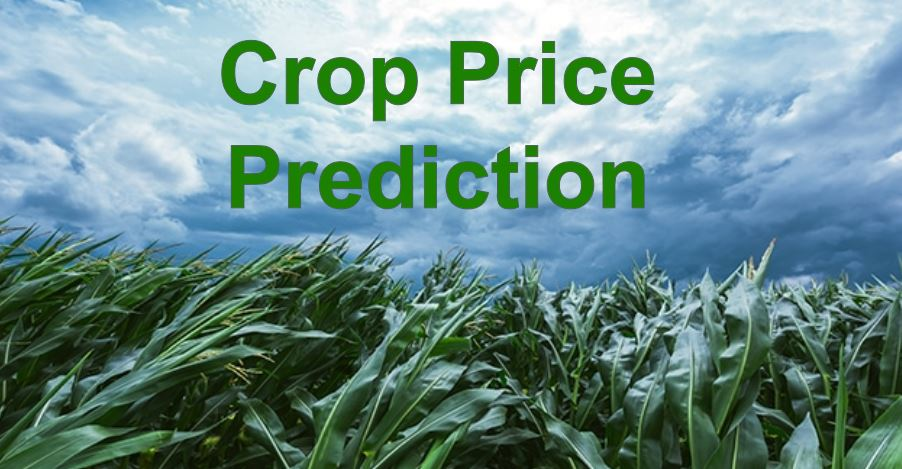

#Import required libraries

In [1]:
import pandas as pd #to have data in structured format
import numpy as np #for dimentional arrays and matrices
import seaborn as sns #visualization
import matplotlib.pyplot as plt 

import xgboost
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error as MSE

from datetime import datetime
from sklearn.metrics import r2_score


In [2]:
#mount your google colab link 
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Crop data-Picture,States in India where the crop is grown,Season in which it is grown,Countries where grown.

In [3]:
def crop(crop_name):
    crop_data = {
    "wheat":["/content/drive/MyDrive/Crop Data/static/images/wheat.jpg", "U.P., Punjab, Haryana, Rajasthan, M.P., bihar", "rabi","Sri Lanka, United Arab Emirates, Taiwan"],
    "paddy":["/content/drive/MyDrive/Crop Data/static/images/paddy.jpg", "W.B., U.P., Andhra Pradesh, Punjab, T.N.", "kharif","Bangladesh, Saudi Arabia, Iran"],
    "barley":["/content/drive/MyDrive/Crop Data/static/images/barley.jpg", "Rajasthan, Uttar Pradesh, Madhya Pradesh, Haryana, Punjab", "rabi","Oman, UK, Qatar, USA"],
    "maize":["/content/drive/MyDrive/Crop Data/static/images/maize.jpg", "Karnataka, Andhra Pradesh, Tamil Nadu, Rajasthan, Maharashtra", "kharif", "Hong Kong, United Arab Emirates, France"],
    "bajra":["/content/drive/MyDrive/Crop Data/static/images/bajra.jpg", "Rajasthan, Maharashtra, Haryana, Uttar Pradesh and Gujarat", "kharif", "Oman, Saudi Arabia, Israel, Japan"],
    "copra":["/content/drive/MyDrive/Crop Data/static/images/copra.jpg", "Kerala, Tamil Nadu, Karnataka, Andhra Pradesh, Orissa, West Bengal","rabi", "Veitnam, Bangladesh, Iran, Malaysia"],
    "cotton":["/content/drive/MyDrive/Crop Data/static/images/cotton.jpg", "Punjab, Haryana, Maharashtra, Tamil Nadu, Madhya Pradesh, Gujarat","kharif"," China, Bangladesh, Egypt"],
    "masoor":["/content/drive/MyDrive/Crop Data/static/images/masoor.jpg", "Uttar Pradesh, Madhya Pradesh, Bihar, West Bengal, Rajasthan", "rabi", "Pakistan, Cyprus,United Arab Emirates"],
    "gram":["/content/drive/MyDrive/Crop Data/static/images/gram.jpg", "Madhya Pradesh, Maharashtra, Rajasthan, Uttar Pradesh, Andhra Pradesh & Karnataka", "rabi", "Veitnam, Spain, Myanmar"],
    "groundnut":["/content/drive/MyDrive/Crop Data/static/images/groundnut.jpg", "Andhra Pradesh, Gujarat, Tamil Nadu, Karnataka, and Maharashtra", "kharif", "Indonesia, Jordan, Iraq"],
    "arhar":["/content/drive/MyDrive/Crop Data/static/images/arhar.jpg", "Maharashtra, Karnataka, Madhya Pradesh and Andhra Pradesh", "kharif", "United Arab Emirates, USA, Chicago"],
    "sesamum":["/content/drive/MyDrive/Crop Data/static/images/sesamum.jpg", "Maharashtra, Rajasthan, West Bengal, Andhra Pradesh, Gujarat", "rabi", "Iraq, South Africa, USA, Netherlands"],
    "jowar":["/content/drive/MyDrive/Crop Data/static/images/jowar.jpg", "Maharashtra, Karnataka, Andhra Pradesh, Madhya Pradesh, Gujarat", "kharif", "Torronto, Sydney, New York"],
    "moong":["/content/drive/MyDrive/Crop Data/static/images/moong.jpg", "Rajasthan, Maharashtra, Andhra Pradesh", "rabi", "Qatar, United States, Canada"],
    "niger":["/content/drive/MyDrive/Crop Data/static/images/niger.jpg", "Andha Pradesh, Assam, Chattisgarh, Gujarat, Jharkhand", "kharif", "United States of American,Argenyina, Belgium"],
    "rape":["/content/drive/MyDrive/Crop Data/static/images/rape.jpg", "Rajasthan, Uttar Pradesh, Haryana, Madhya Pradesh, and Gujarat", "rabi", "Veitnam, Malaysia, Taiwan"],
    "jute":["/content/drive/MyDrive/Crop Data/static/images/jute.jpg", " West Bengal , Assam , Orissa , Bihar , Uttar Pradesh", "kharif", "JOrdan, United Arab Emirates, Taiwan"],
    "safflower":["/content/drive/MyDrive/Crop Data/static/images/safflower.jpg",  "Maharashtra, Karnataka, Andhra Pradesh, Madhya Pradesh, Orissa", "kharif", " Philippines, Taiwan, Portugal"],
    "soyabean":["/content/drive/MyDrive/Crop Data/static/images/soyabean.jpg",  "Madhya Pradesh, Maharashtra, Rajasthan, Madhya Pradesh and Maharashtra", "kharif", "Spain, Thailand, Singapore"],
    "urad":["/content/drive/MyDrive/Crop Data/static/images/urad.jpg",  "Andhra Pradesh, Maharashtra, Madhya Pradesh, Tamil Nadu", "rabi", "United States, Canada, United Arab Emirates"],
    "ragi":["/content/drive/MyDrive/Crop Data/static/images/ragi.jpg",  "Maharashtra, Tamil Nadu and Uttarakhand", "kharif", "United Arab Emirates, New Zealand, Bahrain"],
    "sunflower":["/content/drive/MyDrive/Crop Data/static/images/sunflower.jpg",  "Karnataka, Andhra Pradesh, Maharashtra, Bihar, Orissa", "rabi", "Phillippines, United States, Bangladesh"],
    "sugarcane":["/content/drive/MyDrive/Crop Data/static/images/sugarcane.jpg","Uttar Pradesh, Maharashtra, Tamil Nadu, Karnataka, Andhra Pradesh" , "kharif", "Kenya, United Arab Emirates, United Kingdom"]
    }
    return crop_data[crop_name]


#Data set for each crop

In [4]:
commodity_dict = {
    "arhar": "/content/drive/MyDrive/Crop Data/static/Arhar.csv",
    "bajra": "/content/drive/MyDrive/Crop Data/static/Bajra.csv",
    "barley": "/content/drive/MyDrive/Crop Data/static/Barley.csv",
    "copra": "/content/drive/MyDrive/Crop Data/static/Copra.csv",
    "cotton": "/content/drive/MyDrive/Crop Data/static/Cotton.csv",
    "sesamum": "/content/drive/MyDrive/Crop Data/static/Sesamum.csv",
    "gram": "/content/drive/MyDrive/Crop Data/static/Gram.csv",
    "groundnut": "/content/drive/MyDrive/Crop Data/static/Groundnut.csv",
    "jowar": "/content/drive/MyDrive/Crop Data/static/Jowar.csv",
    "maize": "/content/drive/MyDrive/Crop Data/static/Maize.csv",
    "masoor": "/content/drive/MyDrive/Crop Data/static/Masoor.csv",
    "moong": "/content/drive/MyDrive/Crop Data/static/Moong.csv",
    "niger": "/content/drive/MyDrive/Crop Data/static/Niger.csv",
    "paddy": "/content/drive/MyDrive/Crop Data/static/Paddy.csv",
    "ragi": "/content/drive/MyDrive/Crop Data/static/Ragi.csv",
    "rape": "/content/drive/MyDrive/Crop Data/static/Rape.csv",
    "jute": "/content/drive/MyDrive/Crop Data/static/Jute.csv",
    "safflower": "/content/drive/MyDrive/Crop Data/static/Safflower.csv",
    "soyabean": "/content/drive/MyDrive/Crop Data/static/Soyabean.csv",
    "sugarcane": "/content/drive/MyDrive/Crop Data/static/Sugarcane.csv",
    "sunflower": "/content/drive/MyDrive/Crop Data/static/Sunflower.csv",
    "urad": "/content/drive/MyDrive/Crop Data/static/Urad.csv",
    "wheat": "/content/drive/MyDrive/Crop Data/static/Wheat.csv"
}




#Annual Rainfall with base price

In [5]:
annual_rainfall = [29, 21, 37.5, 30.7, 52.6, 150, 299, 251.7, 179.2, 70.5, 39.8, 10.9]
base = {
    "Paddy": 1245.5,
    "Arhar": 3200,
    "Bajra": 1175,
    "Barley": 980,
    "Copra": 5100,
    "Cotton": 3600,
    "Sesamum": 4200,
    "Gram": 2800,
    "Groundnut": 3700,
    "Jowar": 1520,
    "Maize": 1175,
    "Masoor": 2800,
    "Moong": 3500,
    "Niger": 3500,
    "Ragi": 1500,
    "Rape": 2500,
    "Jute": 1675,
    "Safflower": 2500,
    "Soyabean": 2200,
    "Sugarcane": 2250,
    "Sunflower": 3700,
    "Urad": 4300,
    "Wheat": 1350

}
commodity_list = []

In [6]:
#Indicate the no. of crops
len(commodity_dict)

23

#Data set values and description/Data preprocessing

Data set contains month number,Year,Rainfall ,WPI for 23 crops.Wholesale price index (WPI) is an index that measures and tracks the changes in the price of crops in the stages before the retail level. Here our goal is to predict the WPI for future using Machine Learning model.This may help the farmers to analyse the prices of 23 different crops.

In [7]:
dataset=pd.read_csv("/content/drive/MyDrive/Crop Data/static/Arhar.csv")

In [8]:
dataset.head()

,Month,Year,Rainfall,WPI
0,4,2012,47.5,97.1
1,5,2012,31.7,99.7
2,6,2012,117.8,101.6
3,7,2012,250.2,108.6
4,8,2012,262.4,115.6


In [9]:
dataset.isnull().sum()

Month       0
Year        0
Rainfall    0
WPI         0
dtype: int64

In [92]:
dataset.shape

(81, 4)

In [93]:
X= dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 3].values

In [94]:
print(X)

[[4.000e+00 2.012e+03 4.750e+01]
 [5.000e+00 2.012e+03 3.170e+01]
 [6.000e+00 2.012e+03 1.178e+02]
 [7.000e+00 2.012e+03 2.502e+02]
 [8.000e+00 2.012e+03 2.624e+02]
 [9.000e+00 2.012e+03 1.935e+02]
 [1.000e+01 2.012e+03 5.870e+01]
 [1.100e+01 2.012e+03 3.070e+01]
 [1.200e+01 2.012e+03 1.170e+01]
 [1.000e+00 2.013e+03 1.130e+01]
 [2.000e+00 2.013e+03 4.010e+01]
 [3.000e+00 2.013e+03 1.570e+01]
 [4.000e+00 2.013e+03 3.040e+01]
 [5.000e+00 2.013e+03 5.780e+01]
 [6.000e+00 2.013e+03 2.198e+02]
 [7.000e+00 2.013e+03 3.100e+02]
 [8.000e+00 2.013e+03 2.547e+02]
 [9.000e+00 2.013e+03 1.527e+02]
 [1.000e+01 2.013e+03 1.294e+02]
 [1.100e+01 2.013e+03 1.400e+01]
 [1.200e+01 2.013e+03 6.700e+00]
 [1.000e+00 2.014e+03 1.920e+01]
 [2.000e+00 2.014e+03 2.740e+01]
 [3.000e+00 2.014e+03 3.610e+01]
 [4.000e+00 2.014e+03 2.220e+01]
 [5.000e+00 2.014e+03 7.290e+01]
 [6.000e+00 2.014e+03 9.540e+01]
 [7.000e+00 2.014e+03 2.612e+02]
 [8.000e+00 2.014e+03 2.375e+02]
 [9.000e+00 2.014e+03 1.880e+02]
 [1.000e+0

In [95]:
print(Y)

[ 97.1  99.7 101.6 108.6 115.6 118.6 116.3 114.4 110.2 109.1 110.6 116.3
 118.1 118.2 117.7 116.5 116.7 117.2 118.4 119.  118.4 118.1 118.4 119.
 120.6 121.  120.1 122.2 126.8 126.5 126.3 127.7 128.2 134.3 139.1 144.8
 148.4 157.3 173.7 174.8 185.5 196.9 219.  217.1 222.8 215.8 205.5 201.2
 217.5 216.8 217.2 215.1 195.  184.6 182.4 178.9 166.  140.7 133.1 126.
 127.2 121.6 118.3 114.1 115.4 118.4 113.8 111.6 112.6 114.9 116.5 116.6
 115.3 115.9 113.2 111.2 110.8 110.8 109.4 114.  123.9]


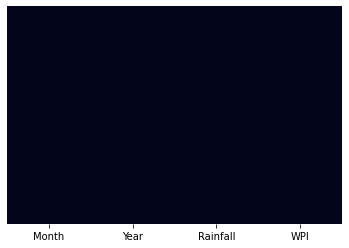

In [96]:
#It is used to visualize the null values
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     81 non-null     int64  
 1   Year      81 non-null     int64  
 2   Rainfall  81 non-null     float64
 3   WPI       81 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.7 KB


In [98]:
dataset.describe()

,Month,Year,Rainfall,WPI
count,81.000000,81.000000,81.000000,81.000000
mean,6.666667,2015.111111,97.571605,138.125926
std,3.420526,1.962142,92.680481,36.392117
min,1.000000,2012.000000,6.700000,97.100000
25%,4.000000,2013.000000,22.800000,115.400000
50%,7.000000,2015.000000,57.800000,119.000000
75%,10.000000,2017.000000,171.500000,148.400000
max,12.000000,2018.000000,310.000000,222.800000


In [123]:
#For a single crop
regressor=xgboost.XGBRegressor(max_depth=20)
model=regressor.fit(X,Y)

[17:17:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


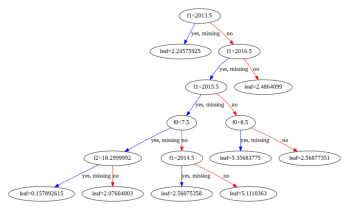

In [124]:
plot_tree(model,num_trees=15)#100 trees are present

#Training and predicting the values.Different functions required to forecast

Dataset is trained with different models like DECISION TREE REGRESSOR,LINEAR REGRESSION but found less errors when trained with XGBOOST REGRESSOR.So i chose xgboost regressor.

XGBoost-Extreme Gradient Boosting
Gradient boosting refers to a class of ensemble machine learning algorithms that can be used for classification or regression predictive modeling problems.

Ensembles are constructed from decision tree models. Trees are added one at a time to the ensemble and fit to correct the prediction errors made by prior models. This is a type of ensemble machine learning model referred to as boosting.

Models are fit using any arbitrary differentiable loss function and gradient descent optimization algorithm. This gives the technique its name, “gradient boosting,” as the loss gradient is minimized as the model is fit, much like a neural network.

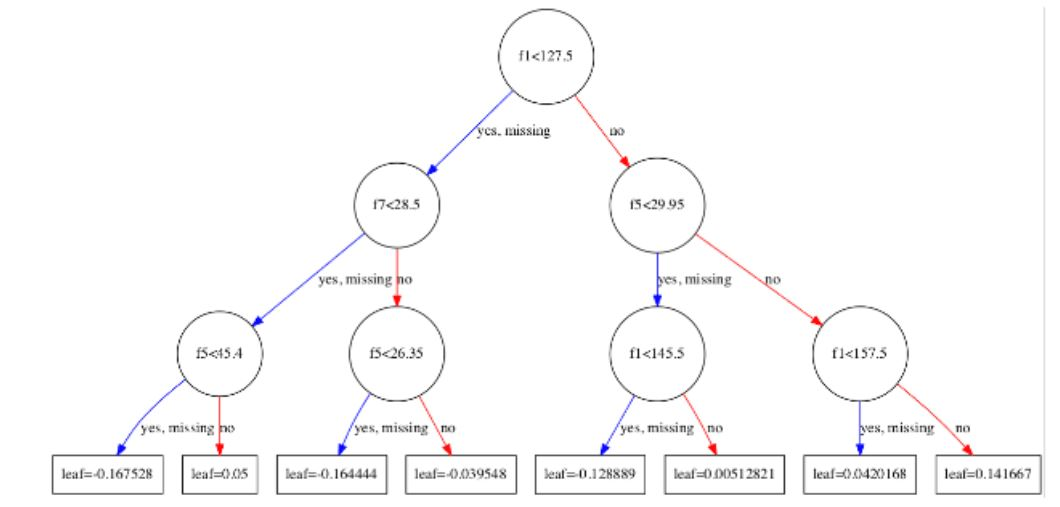

In [73]:
from xgboost import plot_tree
#Object for every crop is created
from sklearn.model_selection import train_test_split #to split the data set into test and train
class Commodity:

    def __init__(self, csv_name):
        self.name = csv_name
        dataset = pd.read_csv(csv_name)
        self.X = dataset.iloc[:, :-1].values
        self.Y = dataset.iloc[:, 3].values

        #from sklearn.model_selection import train_test_split
        self.X_train,self.X_test,self.Y_train,self.Y_test = train_test_split(self.X,self.Y, test_size=0.1, random_state=10)


        self.regressor=xgboost.XGBRegressor()


        # Fitting xgboost regression to dataset
        self.Model=self.regressor.fit(self.X_train, self.Y_train)
        

    def model(self):
      print(self.Model)

    def score_check(self):
        self.Y_pred=self.regressor.predict(self.X_test)

        #print("Score:",self.regressor.score(self.X,self.Y))
        #print("Mean squared error: ",np.sqrt(MSE(self.Y,self.Y_pred)))
        return[self.regressor.score(self.X_test,self.Y_test), np.sqrt(MSE(self.Y_test,self.Y_pred))]

    def getPredictedValue(self, value):
      fsa = np.array(value).reshape(1, 3)
            #print(fsa)
            #print(" ",self.regressor.predict(fsa)[0])
      return self.regressor.predict(fsa)[0]

    def getCropName(self):
        a = self.name.split('.')
        return a[0]

    


In [74]:
#Used to get the crop details
def crop_profile(name):
    max_crop, min_crop, forecast_crop_values = TwelveMonthsForecast(name)
    prev_crop_values = TwelveMonthPrevious(name)
    forecast_x = [i[0] for i in forecast_crop_values]
    forecast_y = [i[1] for i in forecast_crop_values]
    previous_x = [i[0] for i in prev_crop_values]
    previous_y = [i[1] for i in prev_crop_values]
    current_price = CurrentMonth(name)
    #print(max_crop)
    #print(min_crop)
    #print(forecast_crop_values)
    #print(prev_crop_values)
    #print(str(forecast_x))
    crop_data = crop(name)
    context = {
        "name":name,
        "max_crop": max_crop,
        "min_crop": min_crop,
        "forecast_values": forecast_crop_values,
        "forecast_x": str(forecast_x),
        "forecast_y":forecast_y,
        "previous_values": prev_crop_values,
        "previous_x":previous_x,
        "previous_y":previous_y,
        "current_price": current_price,
        "image_url":crop_data[0],
        "prime_loc":crop_data[1],
        "type_c":crop_data[2],
        "export":crop_data[3]
    }
    print(context)

In [75]:
#To get top 5 winners with greater positive change from the previous month
def TopFiveWinners():
    current_month = datetime.now().month
    current_year = datetime.now().year
    current_rainfall = annual_rainfall[current_month - 1]
    prev_month = current_month - 1
    prev_rainfall = annual_rainfall[prev_month - 1]
    current_month_prediction = []
    prev_month_prediction = []
    change = []

    for i in commodity_list:
        current_predict = i.getPredictedValue([float(current_month), current_year, current_rainfall])
        current_month_prediction.append(current_predict)
        prev_predict = i.getPredictedValue([float(prev_month), current_year, prev_rainfall])
        prev_month_prediction.append(prev_predict)
        change.append((((current_predict - prev_predict) * 100 / prev_predict), commodity_list.index(i)))
    sorted_change = change
    sorted_change.sort(reverse=True)
    # print(sorted_change)
    to_send = []
    for j in range(0, 5):
        perc, i = sorted_change[j]
        name = commodity_list[i].getCropName().split('/content/drive/MyDrive/Crop Data/static/')[1]
        to_send.append([name, round((current_month_prediction[i] * base[name]) / 100, 2), round(perc, 2)])
    #print(to_send)
    return to_send

In [76]:
#To get top 5 loser with very less change from previous month
def TopFiveLosers():
    current_month = datetime.now().month
    current_year = datetime.now().year
    current_rainfall = annual_rainfall[current_month - 1]
    prev_month = current_month - 1
    prev_rainfall = annual_rainfall[prev_month - 1]
    current_month_prediction = []
    prev_month_prediction = []
    change = []

    for i in commodity_list:
        current_predict = i.getPredictedValue([float(current_month), current_year, current_rainfall])
        current_month_prediction.append(current_predict)
        prev_predict = i.getPredictedValue([float(prev_month), current_year, prev_rainfall])
        prev_month_prediction.append(prev_predict)
        change.append((((current_predict - prev_predict) * 100 / prev_predict), commodity_list.index(i)))
    sorted_change = change
    sorted_change.sort()
    to_send = []
    for j in range(0, 5):
        perc, i = sorted_change[j]
        name = commodity_list[i].getCropName().split('/content/drive/MyDrive/Crop Data/static/')[1]
        to_send.append([name, round((current_month_prediction[i] * base[name]) / 100, 2), round(perc, 2)])
   # print(to_send)
    return to_send

In [77]:
#To get current month price
def CurrentMonth(name):
    data={1:"arhar",2:"bajra",3:"barley",4:"copra",5:"cotton",6:"sesamum",7:"gram",8:"groundnut",9:"jowar",10:"maize", 11:"massor",12:"moong",13:"niger",14:"paddy",15:"ragi",16:"rape",17:"jute",18:"safflower",19:"soyabean",20:"sugarcane",21:"sunflower",22:"urad",23:"wheat"}
    current_month = datetime.now().month
    current_year = datetime.now().year
    current_rainfall = annual_rainfall[current_month - 1]
    name = name.lower()
    commodity = commodity_list[0]
    for i in range(1,len(data)):
        if name == data[i]:
            commodity = commodity_list[i-1]
            break
    #print(str(commodity))
    current_wpi = commodity.getPredictedValue([float(current_month), current_year, current_rainfall])
    current_price = (base[name.capitalize()]*current_wpi)/100
    return current_price

In [78]:
#To get next 1 yr price forcast
def TwelveMonthsForecast(name):
    data={1:"arhar",2:"bajra",3:"barley",4:"copra",5:"cotton",6:"sesamum",7:"gram",8:"groundnut",9:"jowar",10:"maize",11:"massor",12:"moong",13:"niger",14:"paddy",15:"ragi",16:"rape",17:"jute",18:"safflower",19:"soyabean",20:"sugarcane",21:"sunflower",22:"urad",23:"wheat"}
    current_month = datetime.now().month
    current_year = datetime.now().year
    current_rainfall = annual_rainfall[current_month - 1]
    name = name.lower()
    commodity = commodity_list[0]
    for i in range(1,len(data)):
        if name == data[i]:
            commodity = commodity_list[i-1]
            break
    month_with_year = []
    for i in range(1, 13):
        if current_month + i <= 12:
            month_with_year.append((current_month + i, current_year, annual_rainfall[current_month + i - 1]))
        else:
            month_with_year.append((current_month + i - 12, current_year + 1, annual_rainfall[current_month + i - 13]))
    max_index = 0
    min_index = 0
    max_value = 0
    min_value = 9999
    wpis = []
    current_wpi = commodity.getPredictedValue([float(current_month), current_year, current_rainfall])
    change = []

    for m, y, r in month_with_year:
        current_predict = commodity.getPredictedValue([float(m), y, r])
        if current_predict > max_value:
            max_value = current_predict
            max_index = month_with_year.index((m, y, r))
        if current_predict < min_value:
            min_value = current_predict
            min_index = month_with_year.index((m, y, r))
        wpis.append(current_predict)
        change.append(((current_predict - current_wpi) * 100) / current_wpi)

    max_month, max_year, r1 = month_with_year[max_index]
    min_month, min_year, r2 = month_with_year[min_index]
    min_value = min_value * base[name.capitalize()] / 100
    max_value = max_value * base[name.capitalize()] / 100
    crop_price = []
    for i in range(0, len(wpis)):
        m, y, r = month_with_year[i]
        x = datetime(y, m, 1)
        x = x.strftime("%b %y")
        crop_price.append([x, round((wpis[i]* base[name.capitalize()]) / 100, 2) , round(change[i], 2)])
   # print("forecasr", wpis)
    x = datetime(max_year,max_month,1)
    x = x.strftime("%b %y")
    max_crop = [x, round(max_value,2)]
    x = datetime(min_year, min_month, 1)
    x = x.strftime("%b %y")
    min_crop = [x, round(min_value,2)]

    #print(wpis)

    return max_crop, min_crop, crop_price


In [79]:
#To get last 1 yr price forecast
def TwelveMonthPrevious(name):
    name = name.lower()
    current_month = datetime.now().month
    current_year = datetime.now().year
    current_rainfall = annual_rainfall[current_month - 1]
    commodity = commodity_list[0]
    wpis = []
    crop_price = []
    for i in commodity_list:
        if name == str(i):
            commodity = i
            break
    month_with_year = []
    for i in range(1, 13):
        if current_month - i >= 1:
            month_with_year.append((current_month - i, current_year, annual_rainfall[current_month - i - 1]))
        else:
            month_with_year.append((current_month - i + 12, current_year - 1, annual_rainfall[current_month - i + 11]))

    for m, y, r in month_with_year:
        current_predict = commodity.getPredictedValue([float(m),y, r])
        wpis.append(current_predict)

    for i in range(0, len(wpis)):
        m, y, r = month_with_year[i]
        x = datetime(y,m,1)
        x = x.strftime("%b %y")
        crop_price.append([x, round((wpis[i]* base[name.capitalize()]) / 100, 2)])
   # print("previous ", wpis)
    new_crop_price =[]
    for i in range(len(crop_price)-1,-1,-1):
        new_crop_price.append(crop_price[i])
    return new_crop_price

In [80]:
#Creating objects for each crop
commodity_list=[]
arhar = Commodity(commodity_dict["arhar"])
commodity_list.append(arhar)

bajra = Commodity(commodity_dict["bajra"])
commodity_list.append(bajra)

barley = Commodity(commodity_dict["barley"])
commodity_list.append(barley)

copra = Commodity(commodity_dict["copra"])
commodity_list.append(copra)

cotton = Commodity(commodity_dict["cotton"])
commodity_list.append(cotton)

sesamum = Commodity(commodity_dict["sesamum"])
commodity_list.append(sesamum)

gram = Commodity(commodity_dict["gram"])
commodity_list.append(gram)

groundnut = Commodity(commodity_dict["groundnut"])
commodity_list.append(groundnut)

jowar = Commodity(commodity_dict["jowar"])
commodity_list.append(jowar)

maize = Commodity(commodity_dict["maize"])
commodity_list.append(maize)

masoor = Commodity(commodity_dict["masoor"])
commodity_list.append(masoor)

moong = Commodity(commodity_dict["moong"])
commodity_list.append(moong)

niger = Commodity(commodity_dict["niger"])
commodity_list.append(niger)

paddy = Commodity(commodity_dict["paddy"])
commodity_list.append(paddy)

ragi = Commodity(commodity_dict["ragi"])
commodity_list.append(ragi)

rape = Commodity(commodity_dict["rape"])
commodity_list.append(rape)

jute = Commodity(commodity_dict["jute"])
commodity_list.append(jute)

safflower = Commodity(commodity_dict["safflower"])
commodity_list.append(safflower)

soyabean = Commodity(commodity_dict["soyabean"])
commodity_list.append(soyabean)

sugarcane = Commodity(commodity_dict["sugarcane"])
commodity_list.append(sugarcane)

sunflower = Commodity(commodity_dict["sunflower"])
commodity_list.append(sunflower)

urad = Commodity(commodity_dict["urad"])
commodity_list.append(urad)

wheat = Commodity(commodity_dict["wheat"])
commodity_list.append(wheat)

print(commodity_list)#

[17:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:04:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

#Evaluating

In [81]:
#check the model which has been created for different crops
for i in commodity_list:
  i.model()

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
XGBRegressor(base_score=0.5, booster

In [83]:
#Score and RMSE in model for every crop
S1=[]
E1=[]

for i in commodity_list:
  s=i.score_check()
  S1.append(s[0])
  E1.append(s[1])


print("Scores:",S1)
print("RMSE:",E1)
  

Scores: [0.8975132752618417, 0.7852846084302245, 0.9227398148659152, 0.7777706108468545, 0.8865781282950611, 0.8802677615343915, 0.8889545948660954, 0.36040739480679085, 0.9264947401215161, 0.6580833863309661, 0.9608402150401466, 0.9489085111180598, 0.9630143821753978, 0.9545815544150683, 0.9290709604098588, 0.7498451972806124, 0.9291242487438743, 0.9121370134503545, 0.355717445482432, 0.91762859973197, 0.7921219474876922, 0.9407226343624933, 0.8834238667646236]
RMSE: [13.751728913633437, 6.438759113161069, 3.6730592554440387, 16.822258637795237, 5.885365521959158, 4.700812069593332, 10.766491406604079, 9.96244163389586, 2.744984975848212, 4.672365126509196, 5.901283322445639, 5.945483633969455, 8.318041666588458, 2.337250519227333, 10.488039797358025, 5.548237397906173, 9.135612575969889, 3.696170283406136, 13.998993617860151, 5.904966323202113, 2.840373488477452, 10.897251172963694, 3.3627369895299903]


#Hyperparameter tuning

Hyperparameter tuning is used to reduce the errors after training.I have changed the parameters with different values and found this model with good difference

In [84]:
#changed the max depth of the tree to 20
#changed the learning rate to 0.3
#changed no. of estimators to 200


#Object for every crop is created
class Commodity:

    def __init__(self, csv_name):
        self.name = csv_name
        dataset = pd.read_csv(csv_name)
        self.X = dataset.iloc[:, :-1].values
        self.Y = dataset.iloc[:, 3].values

        #from sklearn.model_selection import train_test_split
        #X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
        self.X_train,self.X_test,self.Y_train,self.Y_test = train_test_split(self.X,self.Y, test_size=0.1, random_state=10)



        self.regressor=xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=20,
             min_child_weight=3,
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1)

        self.Model=self.regressor.fit(self.X_train, self.Y_train)
        

    def model(self):
      print(self.Model)

    def score_check(self):
        self.Y_pred=self.regressor.predict(self.X_test)

        #print("Score:",self.regressor.score(self.X,self.Y))
        #print("Mean squared error: ",np.sqrt(MSE(self.Y,self.Y_pred)))
        return[self.regressor.score(self.X_test,self.Y_test), np.sqrt(MSE(self.Y_test,self.Y_pred))]

    def getPredictedValue(self, value):
      fsa = np.array(value).reshape(1, 3)
            #print(fsa)
            #print(" ",self.regressor.predict(fsa)[0])
      return self.regressor.predict(fsa)[0]

    def getCropName(self):
        a = self.name.split('.')
        return a[0]


In [85]:
#objects are created again with new models.
commodity_list=[]
arhar = Commodity(commodity_dict["arhar"])
commodity_list.append(arhar)
print(commodity_list)
bajra = Commodity(commodity_dict["bajra"])
commodity_list.append(bajra)
print(commodity_list)
barley = Commodity(commodity_dict["barley"])
commodity_list.append(barley)
print(commodity_list)
copra = Commodity(commodity_dict["copra"])
commodity_list.append(copra)
print(commodity_list)
cotton = Commodity(commodity_dict["cotton"])
commodity_list.append(cotton)
print(commodity_list)
sesamum = Commodity(commodity_dict["sesamum"])
commodity_list.append(sesamum)
print(commodity_list)
gram = Commodity(commodity_dict["gram"])
commodity_list.append(gram)
print(commodity_list)
groundnut = Commodity(commodity_dict["groundnut"])
commodity_list.append(groundnut)
print(commodity_list)
jowar = Commodity(commodity_dict["jowar"])
commodity_list.append(jowar)
maize = Commodity(commodity_dict["maize"])
commodity_list.append(maize)
masoor = Commodity(commodity_dict["masoor"])
commodity_list.append(masoor)
moong = Commodity(commodity_dict["moong"])
commodity_list.append(moong)
niger = Commodity(commodity_dict["niger"])
commodity_list.append(niger)
paddy = Commodity(commodity_dict["paddy"])
commodity_list.append(paddy)
ragi = Commodity(commodity_dict["ragi"])
commodity_list.append(ragi)
rape = Commodity(commodity_dict["rape"])
commodity_list.append(rape)
jute = Commodity(commodity_dict["jute"])
commodity_list.append(jute)
safflower = Commodity(commodity_dict["safflower"])
commodity_list.append(safflower)
soyabean = Commodity(commodity_dict["soyabean"])
commodity_list.append(soyabean)
sugarcane = Commodity(commodity_dict["sugarcane"])
commodity_list.append(sugarcane)
sunflower = Commodity(commodity_dict["sunflower"])
commodity_list.append(sunflower)
urad = Commodity(commodity_dict["urad"])
commodity_list.append(urad)
wheat = Commodity(commodity_dict["wheat"])
commodity_list.append(wheat)


[17:04:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:04:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[<__main__.Commodity object at 0x7f578fb93710>, <__main__.Commodity object at 0x7f575e4eba50>]
[17:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[<__main__.Commodity object at 0x7f578fb93710>, <__main__.Commodity object at 0x7f575e4eba50>, <__main__.Commodity object at 0x7f57629c5b90>]
[17:04:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[<__main__.Commodity object at 0x7f578fb93710>, <__main__.Commodity object at 0x7f575e4eba50>, <__main__.Commodity object at 0x7f57629c5b90>, <__main__.Commodity object at 0x7f5762961ad0>]
[17:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152

In [86]:
#RMSE in model for every crop
S2=[]
E2=[]
j=1
for i in commodity_list:
  s=i.score_check()
  S2.append(s[0])
  E2.append(s[1])


print("Scores:",S2)
print("RMSE:",E2)

Scores: [0.938264861350892, 0.9095479753082173, 0.9330817107052314, 0.9176383184707724, 0.923202826349336, 0.8231896351310182, 0.9437715304190706, 0.8564404465675873, 0.7680785372721464, 0.8303932703436554, 0.9790979352957937, 0.9477550216389017, 0.9075253358789193, 0.9629079600222784, 0.9195202573671895, 0.7635535204516638, 0.9540850872108592, 0.9540631496148839, 0.6066431279797746, 0.9933980826171087, 0.8489927626565166, 0.9431625255526516, 0.8409615518297584]
RMSE: [10.673078640824528, 4.179070861366463, 3.4183968328730403, 10.241089509285393, 4.842812495915717, 5.712434039515746, 7.6612923172058105, 4.719870929040888, 4.875860073229966, 3.290775172605349, 4.311425743020677, 6.012224449290609, 13.152733904547825, 2.112173021685895, 11.171862358654414, 5.394075722491837, 7.353019503582605, 2.6725731310054814, 10.93835465576409, 1.6717227139391824, 2.4208618792553582, 10.670626033620318, 3.9277075435327373]


#Visualizing before and after errors

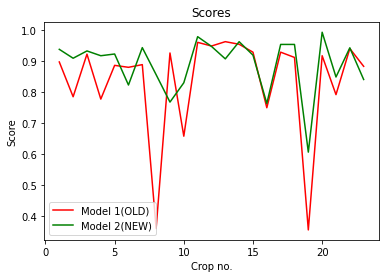

In [87]:
import matplotlib.pyplot as plt
X = [i for i in range(1,24)]
  
# Assign variables to the y axis part of the curve
y = S1
z = S2
  
# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='Model 1(OLD)')
plt.plot(X, z, color='g', label='Model 2(NEW)')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Crop no.")
plt.ylabel("Score")
plt.title("Scores")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

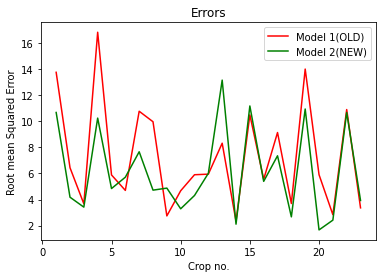

In [88]:
X = [i for i in range(1,24)]
  
# Assign variables to the y axis part of the curve
y = E1
z = E2
  
# Plotting both the curves simultaneously
plt.plot(X, y, color='r', label='Model 1(OLD)')
plt.plot(X, z, color='g', label='Model 2(NEW)')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Crop no.")
plt.ylabel("Root mean Squared Error")
plt.title("Errors")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

#Predicting and getting the data for any single crop




In [40]:
#gives the details of the crops
crop_profile('paddy')

{'name': 'paddy', 'max_crop': ['Sep 21', 1939.24], 'min_crop': ['Feb 22', 1885.81], 'forecast_values': [['Aug 21', 1938.0, 0.38], ['Sep 21', 1939.24, 0.44], ['Oct 21', 1938.19, 0.39], ['Nov 21', 1928.25, -0.13], ['Dec 21', 1910.85, -1.03], ['Jan 22', 1892.86, -1.96], ['Feb 22', 1885.81, -2.32], ['Mar 22', 1898.73, -1.66], ['Apr 22', 1909.28, -1.11], ['May 22', 1921.44, -0.48], ['Jun 22', 1915.88, -0.77], ['Jul 22', 1930.68, 0.0]], 'forecast_x': "['Aug 21', 'Sep 21', 'Oct 21', 'Nov 21', 'Dec 21', 'Jan 22', 'Feb 22', 'Mar 22', 'Apr 22', 'May 22', 'Jun 22', 'Jul 22']", 'forecast_y': [1938.0, 1939.24, 1938.19, 1928.25, 1910.85, 1892.86, 1885.81, 1898.73, 1909.28, 1921.44, 1915.88, 1930.68], 'previous_values': [['Jul 20', 1381.87], ['Aug 20', 1380.05], ['Sep 20', 1379.98], ['Oct 20', 1370.76], ['Nov 20', 1408.13], ['Dec 20', 1486.72], ['Jan 21', 1385.53], ['Feb 21', 1450.86], ['Mar 21', 1413.17], ['Apr 21', 1450.0], ['May 21', 1425.71], ['Jun 21', 1409.85]], 'previous_x': ['Jul 20', 'Aug 20

In [41]:
#Get the next 12 months forecasted price along with max and min price 
TF=TwelveMonthsForecast("paddy")
print("Max:",TF[0])
print("Min:",TF[1])
print("Forecast:",TF[2])

Max: ['Sep 21', 1939.24]
Min: ['Feb 22', 1885.81]
Forecast: [['Aug 21', 1938.0, 0.38], ['Sep 21', 1939.24, 0.44], ['Oct 21', 1938.19, 0.39], ['Nov 21', 1928.25, -0.13], ['Dec 21', 1910.85, -1.03], ['Jan 22', 1892.86, -1.96], ['Feb 22', 1885.81, -2.32], ['Mar 22', 1898.73, -1.66], ['Apr 22', 1909.28, -1.11], ['May 22', 1921.44, -0.48], ['Jun 22', 1915.88, -0.77], ['Jul 22', 1930.68, 0.0]]


In [42]:
CurrentMonth("paddy")


1930.6829300689697

In [43]:
#get the price of any particular crop with respective month
price=[]
for i in range(len(TF[2])):
    price.append(TF[2][i][1])
print(price)
months=[]
for i in range(len(TF[2])):
    months.append(TF[2][i][0])
print(months)

[1938.0, 1939.24, 1938.19, 1928.25, 1910.85, 1892.86, 1885.81, 1898.73, 1909.28, 1921.44, 1915.88, 1930.68]
['Aug 21', 'Sep 21', 'Oct 21', 'Nov 21', 'Dec 21', 'Jan 22', 'Feb 22', 'Mar 22', 'Apr 22', 'May 22', 'Jun 22', 'Jul 22']


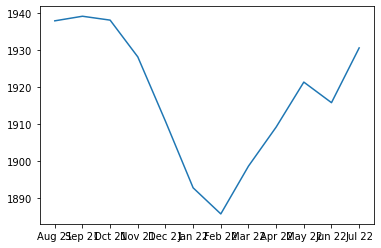

In [44]:
#plot the graph between price and months
plt.plot(months,price)
plt.show()

In [45]:
#Top 5 crops which have profitable change in the market 
TopFiveWinners()

[['Gram', 3709.8, 8.95],
 ['Rape', 3515.59, 2.29],
 ['Bajra', 1554.83, 2.2],
 ['Jute', 2831.39, 1.76],
 ['Groundnut', 4143.44, 1.72]]

In [46]:
#Least 5 crops which have less profitable change in the market 
TopFiveLosers()

[['Soyabean', 3125.16, -7.21],
 ['Niger', 4676.36, -5.71],
 ['Arhar', 3550.36, -1.98],
 ['Safflower', 3382.15, -1.58],
 ['Sunflower', 3709.27, -1.04]]

#User selection

In [47]:
from PIL import Image
import matplotlib.image as img
def crop_profile_selection():
        choicedata={1:"arhar",2:"bajra",3:"barley",4:"copra",5:"cotton",6:"sesamum",7:"gram",8:"groundnut",9:"jowar",10:"maize",11:"masoor",12:"moong",13:"niger",14:"paddy",15:"ragi",16:"rape",17:"jute",18:"safflower",19:"soyabean",20:"sugarcane",21:"sunflower",22:"urad",23:"wheat"}
        select=int(input("1:arhar 2:bajra 3:barley 4:copra 5:cotton 6:sesamum 7:gram 8:groundnut 9:jowar 10:maize\n11:massor 12:moong 13:niger 14:paddy 15:ragi 16:rape 17:jute 18:safflower 19:soyabean 20:sugarcane\n21:sunflower 22:urad 23:wheat  Enter your crop selection:"))
        crop_data=crop(choicedata[select])
        print("Name:",choicedata[select])
        cp=img.imread(crop_data[0])
        plt.title(choicedata[select])
        plt.imshow(cp)
        print("States in India where ",choicedata[select]," is grown:",crop_data[1])
        print("Countries where ",choicedata[select]," is grown:",crop_data[3])
        print("Season in which ",choicedata[select]," is grown:",crop_data[2])
        


In [48]:
def crop_forcast():
     choicedata={1:"arhar",2:"bajra",3:"barley",4:"copra",5:"cotton",6:"sesamum",7:"gram",8:"groundnut",9:"jowar",10:"maize", 11:"masoor",12:"moong",13:"niger",14:"paddy",15:"ragi",16:"rape",17:"jute",18:"safflower",19:"soyabean",20:"sugarcane",21:"sunflower",22:"urad",23:"wheat"}
     select=int(input("1:arhar 2:bajra 3:barley 4:copra 5:cotton 6:sesamum 7:gram 8:groundnut 9:jowar 10:maize\n11:massor 12:moong 13:niger 14:paddy 15:ragi 16:rape 17:jute 18:safflower 19:soyabean 20:sugarcane\n21:sunflower 22:urad 23:wheat  Enter your crop selection: "))
     max_crop, min_crop, forecast_crop_values = TwelveMonthsForecast(choicedata[select])
     prev_crop_values = TwelveMonthPrevious(choicedata[select])
     forecast_x = [i[0] for i in forecast_crop_values]
     forecast_y = [i[1] for i in forecast_crop_values]
     previous_x = [i[0] for i in prev_crop_values]
     previous_y = [i[1] for i in prev_crop_values]
     current_price = CurrentMonth(choicedata[select])
     print("Maximum price obtained in: ",max_crop[0]," which is ",max_crop[1])
     print("Minimum price obtained in:",min_crop[0]," which is ",min_crop[1])
     print("Current price of the crop:",current_price)
     #print(forecast_crop_values)
     forecast_crop_table=pd.DataFrame(forecast_crop_values,index=[1,2,3,4,5,6,7,8,9,10,11,12],columns=['Month and year','Price','Change from previous month'])
     print(forecast_crop_table)
     print("Previous year price:",prev_crop_values)
     plt.plot(forecast_x,forecast_y,'r')
     plt.xlabel("Months")
     plt.ylabel("Price")
     plt.title(choicedata[select])
     plt.show()
    


Enter your action: 1: Crop profile 2:Crop forcast 3:Top five crops 4:Least five crops:2
1:arhar 2:bajra 3:barley 4:copra 5:cotton 6:sesamum 7:gram 8:groundnut 9:jowar 10:maize
11:massor 12:moong 13:niger 14:paddy 15:ragi 16:rape 17:jute 18:safflower 19:soyabean 20:sugarcane
21:sunflower 22:urad 23:wheat  Enter your crop selection: 14
Maximum price obtained in:  Sep 21  which is  1939.24
Minimum price obtained in: Feb 22  which is  1885.81
Current price of the crop: 1930.6829300689697
   Month and year    Price  Change from previous month
1          Aug 21  1938.00                        0.38
2          Sep 21  1939.24                        0.44
3          Oct 21  1938.19                        0.39
4          Nov 21  1928.25                       -0.13
5          Dec 21  1910.85                       -1.03
6          Jan 22  1892.86                       -1.96
7          Feb 22  1885.81                       -2.32
8          Mar 22  1898.73                       -1.66
9          Apr 2

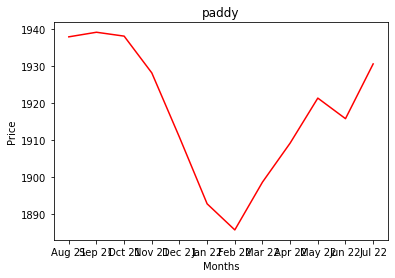

In [49]:
#Allows the user to choose
choose=int(input("Enter your action: 1: Crop profile 2:Crop forcast 3:Top five crops 4:Least five crops:"))
if choose==1:
    crop_profile_selection()
elif choose==2:
    crop_forcast()
elif choose==3:
    TW=TopFiveWinners()
    TW=pd.DataFrame(TW,index=[1,2,3,4,5],columns=['Crop','Prize','Change in wpi'])
    print(TW)
elif choose==4:
    TL=TopFiveLosers()
    TL=pd.DataFrame(TL,index=[1,2,3,4,5],columns=['Crop','Prize','Change in wpi'])
    print(TL)



......................Through this one can cultivate crops according to the price in the future with certain rainfall.The annual rainfall has to be updated for new predictions.............................